In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from joblib import dump

In [2]:
file_path = "TARP.csv"  
df = pd.read_csv(file_path, sep=",")

/tmp/ipykernel_2390/3555222552.py:3: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=",")


In [3]:
df.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70.0,21.0,19.52,2.13,55.04,6.30,101.50,6.502985292,202.935536,90.0,42.0,43.0,ON
1,12,20,40.0,104.0,19.49,2.01,55.17,10.46,101.50,7.038096361,226.655537,85.0,58.0,41.0,OFF
2,34,26,35.0,62.0,19.47,1.90,55.30,14.63,101.51,7.840207144,263.964248,60.0,55.0,44.0,ON
3,7,44,44.0,93.0,19.54,2.28,54.20,16.08,101.51,6.980400905,242.864034,74.0,35.0,40.0,OFF
4,50,38,23.0,92.0,19.61,2.66,53.09,17.52,101.51,7.628472891,262.717340,78.0,42.0,42.0,OFF


# Heatmap visualisation

/tmp/ipykernel_2390/1940941232.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


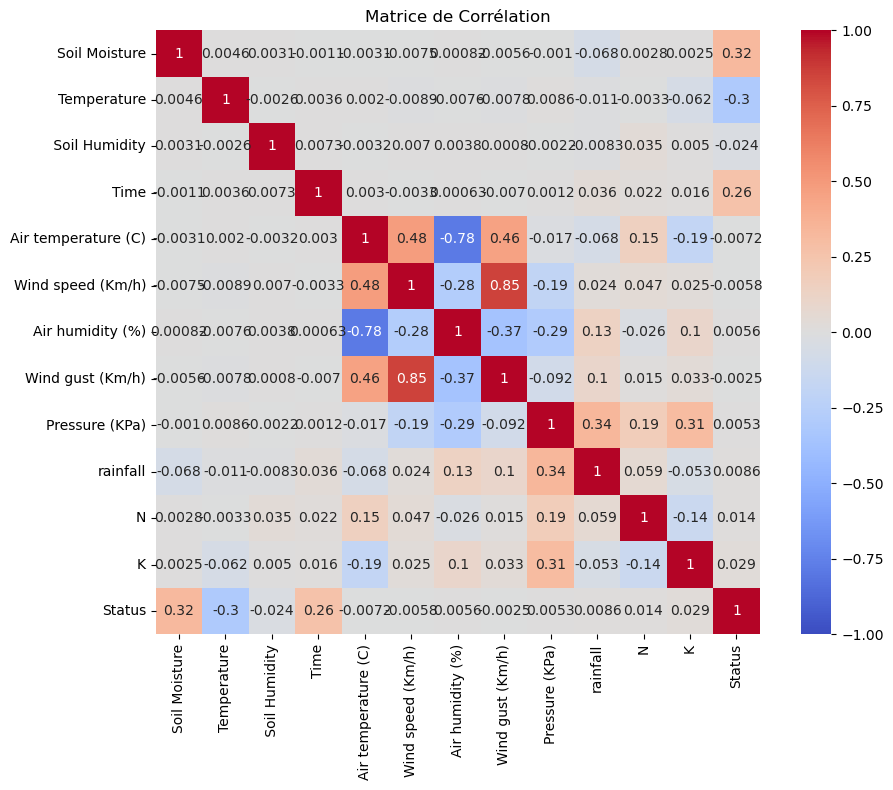

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm', 
            vmin=-1, vmax=1, 
            center=0,  
            square=True)  

plt.title('Matrice de Corrélation')

plt.tight_layout()

plt.show()

# Deleting non relevant features

In [4]:
L = ['Time','Wind gust (Km/h)','Wind speed (Km/h)', 'Pressure (KPa)','ph','rainfall','N','P','K','Air temperature (C)','Air humidity (%)']
df.drop(columns=L, axis=1, inplace=True)

# Feature-encoding of 'staus'

In [5]:
print(df['Status'].dtype)
print(df['Status'].unique()

df['Status'] = df['Status'].astype(str)

encoder = LabelBinarizer()
df['Status'] = encoder.fit_transform(df['Status'])

print(df['Status'].unique())


object
['ON' 'OFF' nan]
[0 1]


In [6]:
encoder = LabelBinarizer()
df['Status'] = encoder.fit_transform(df['Status'])

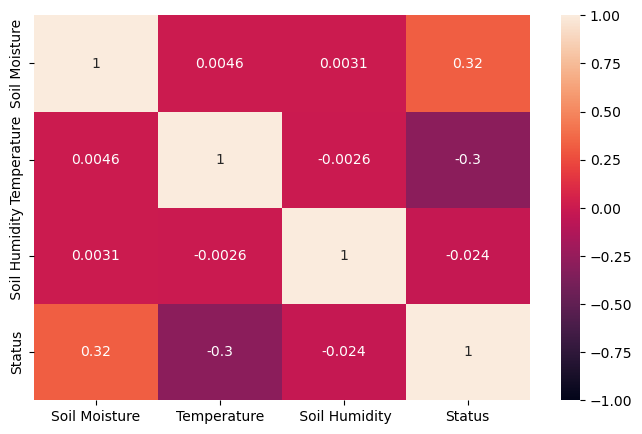

In [7]:
plt.figure(figsize=(8, 5))
sns.heatmap(data=df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()


In [14]:
df.head()

,Soil Moisture,Temperature,Soil Humidity,Status
0,54,22,70.0,0
1,12,20,40.0,1
2,34,26,35.0,0
3,7,44,44.0,1
4,50,38,23.0,1


In [19]:
print(df.columns)


Index(['Soil Moisture', 'Temperature', ' Soil Humidity', 'Status'], dtype='object')


In [20]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Soil Moisture', 'Temperature', 'Soil Humidity', 'Status'], dtype='object')


# Data distribution visualisation

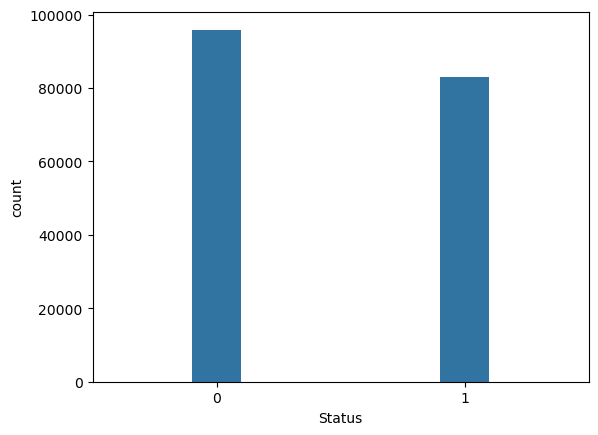

In [8]:
ax = sns.countplot(x="Status", width=0.2, data=df)
plt.show()


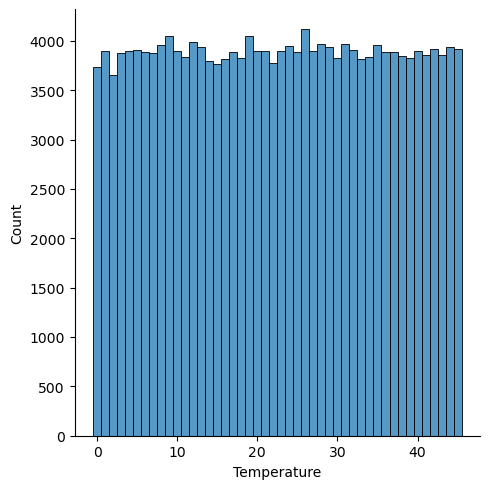

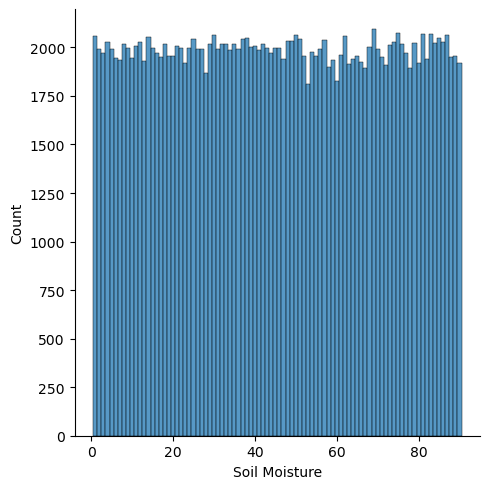

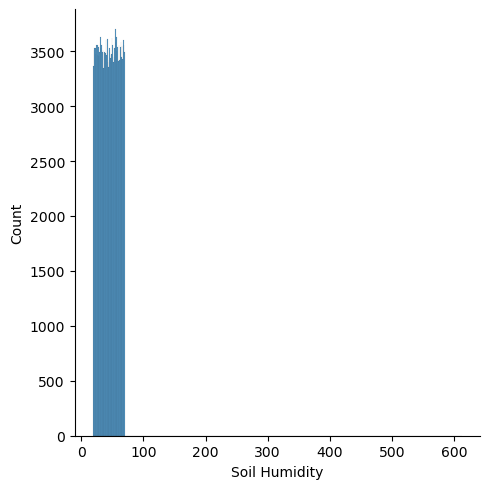

In [24]:
sns.displot(df, x="Temperature", binwidth=3, bins=20, discrete=True, height=5)
sns.displot(df, x="Soil Moisture", binwidth=3, bins=20, discrete=True, height=5)
sns.displot(df, x="Soil Humidity", binwidth=3, bins=20, discrete=True, height=5)

plt.show()


# Saving data for train and test

In [22]:
train, test = train_test_split(df, test_size=0.3, stratify=data['Status'])


In [16]:
train.head()

,Soil Moisture,Temperature,Soil Humidity,Status
55246,10,28,33.0,0
47577,70,0,22.0,1
129930,69,10,46.0,1
13595,77,37,48.0,0
78962,26,0,38.0,1


In [23]:
current_directory = os.getcwd()

train_path = os.path.join(current_directory, 'train.csv')
test_path = os.path.join(current_directory, 'test.csv')


train.to_csv(train_path, index=False)
test.to_csv(test_path, index=False)


Traitement terminé et fichiers sauvegardés dans le répertoire du notebook.
